# Saliency Detection

This notebook is based off of <a href="https://www.pyimagesearch.com/2018/07/16/opencv-saliency-detection/">this article.</a>

Saliency detection can be used as a image preprocessing tool to detect areas of interest in an image. This preprocessing could be used for object detection by creating proposals for boxes bounding potential objects in an image. Another application might be the use of salience detection on video feeds to detect moving objects.

In any case, Salience Detection algorithms are generally fast, and can be used on real time data like video feeds. This might be useful for robotics systems with limited computational capacity that need to process image data in real time

In [1]:
from cv2 import saliency
import cv2
import os
import matplotlib.pyplot as plt
os.chdir("C://Users//harri//Pictures")

im_paths =  ["dog1.jpg", "dog2.jpg", "dog3.jpg", "huckleberry.jpg", "huckAmy.jpg"]

## Static Saliency
OpenCV has two algorithms for static image saliency detection.
1. Montabone and Soto (2010) <a href="https://www.sciencedirect.com/science/article/pii/S0262885609001371"> link </a>
2. Spectral Residual - Hou and Zhang (2007) <a href="http://bcmi.sjtu.edu.cn/~zhangliqing/Papers/2007CVPR_Houxiaodi_04270292.pdf"> link </a>

In [2]:
def imReader(img_path):
    img = cv2.imread(img_path)
    return img

def getModel(model = "spectral"):
    if model == "spectral":
        salience = cv2.saliency.StaticSaliencySpectralResidual_create()
    if model == "fine":
        salience = cv2.saliency.StaticSaliencyFineGrained_create()
    return salience

def output(img_path, model = "spectral", binary = False):
    sal = getModel(model = model)
    im = imReader(img_path)
    (success, salMap) = sal.computeSaliency(im)
    
    
    """
    Salience Map is a floating point greyscale image (1 channel) with values ranging from [0,1] with values closer 
    to 1 being more salient
    """
    if binary:
        thresh = cv2.threshold(salMap, 0, 255,
                              cv2.THRESH_BINARY +cv2.THRESH_OTSU)[1]
    
    salMap = (salMap * 255).astype("uint8")
    
    """
    Normal spectrum for pixels is [0,255] we multiply the entire map to get an appropriate image  pixel value
    then we change the type from float to int
    """
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    
    plt.figure(figsize = (10,10))
    plt.subplot(131)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Original")
    
    plt.subplot(132)
    plt.imshow(salMap, cmap = "gray")
    plt.title("Saliency Map")
    plt.axis("off")
    
    if binary:
        plt.subplot(133)
        plt.imshow(thresh, cmap = "gray")
        plt.title("Binary Salience Map")
        plt.axis("off")
    
    plt.show()
    return None

### Spectral NonBinary

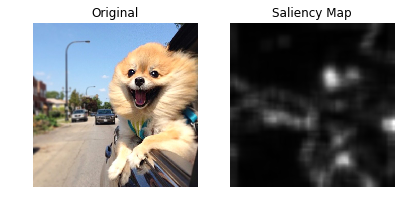

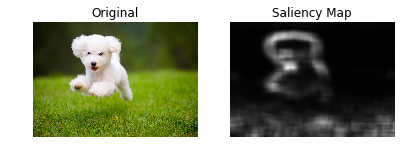

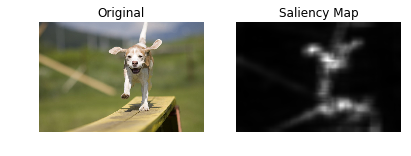

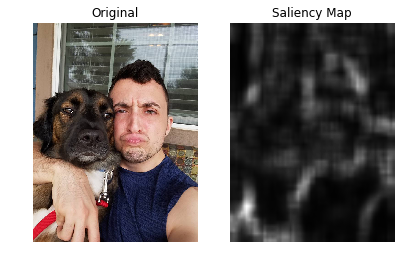

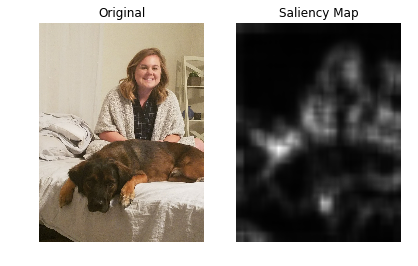

In [3]:
for path in im_paths:
    output(path, model = "spectral", binary =False)

### Fine Binary

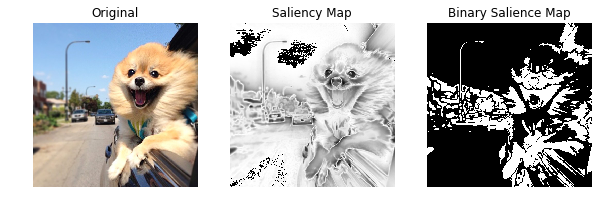

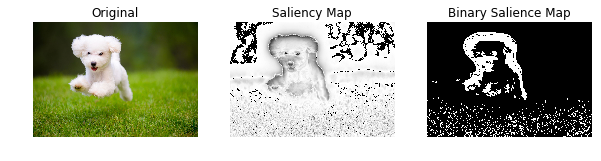

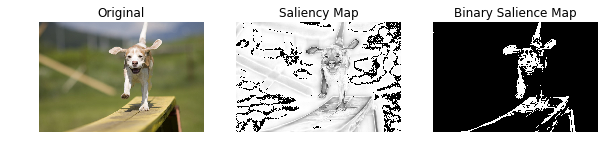

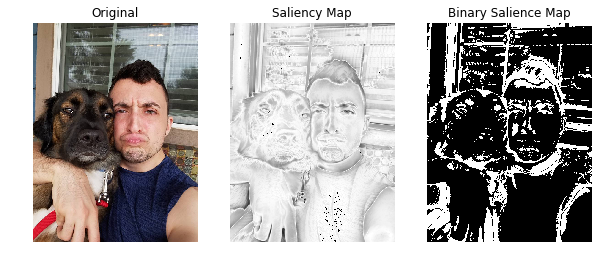

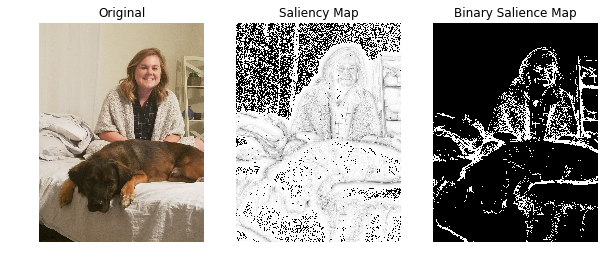

In [4]:
for path in im_paths:
    output(path, model = "fine", binary =True)

## Motion Saliency

In [5]:
from imutils.video import VideoStream
import imutils
import time

In [9]:
def startStream():
    saliency = None
    vs = VideoStream(src=0).start()
    time.sleep(2.0)
    

    while True:
        frame = vs.read()
        frame = imutils.resize(frame, width=500)

        if saliency is None:
            saliency = cv2.saliency.MotionSaliencyBinWangApr2014_create()
            saliency.setImagesize(frame.shape[1], frame.shape[0])
            saliency.init()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        (success, salMap) = saliency.computeSaliency(gray)
        salMap = (salMap*255).astype("uint8")

        cv2.imshow("Saliency Map", salMap)
        key = cv2.waitKey(1) & 0xFF

        if key == ord("q"):
            break

    cv2.destroyAllWindows()
    vs.stop
    return None

In [11]:
startStream()